###  Question: Does median household income affect prices?
* Census Python Package to identify Household Income


In [1]:
#Import Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

api_key = "9c43c55c9067920bded793b5c4d99ae0aba10281"

c = Census(api_key, year=2017)

In [2]:
# Run Census Search to retrieve data on selected zip codes
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E"), 
                         {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Naming
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income"]]

print(len(census_pd))
census_pd.head()

33120


,Zipcode,Population,Median Age,Household Income,Per Capita Income
0,00601,17599.0,38.9,11757.0,7041.0
1,00602,39209.0,40.9,16190.0,8978.0
2,00603,50135.0,40.4,16645.0,10897.0
3,00606,6304.0,42.8,13387.0,5960.0
4,00610,27590.0,41.4,18741.0,9266.0


In [3]:
# Import Final zip codes data
zipcode_30 = pd.read_csv("../Final_Trending_Zipcodes.csv")

# Convert Zip Codes to str in order to extract from Census Data
zipcode_30['Zip Codes']=zipcode_30['Zip Codes'].astype(str)
zipcode_30.dtypes

Zip Codes        object
Borough          object
Neighborhood     object
Mean_2015       float64
Median_2015       int64
Mean_2016       float64
Median_2016       int64
Mean_2017       float64
Median_2017       int64
Mean_2018       float64
Median_2018     float64
dtype: object

In [4]:
# Create list of 30 codes that need to be searched
zips = zipcode_30.groupby('Zip Codes').count()
zips = zips.sort_values('Borough', ascending=False)

zip_list = list(zips.index.values)
zipcodes = zip_list[0:30]

# Extract zip codes data from Census dataframe
census_pd2 = census_pd[census_pd["Zipcode"].isin(zipcodes)]

# Merge Census data with trended data 
zipcode_30 = zipcode_30.rename(columns={'Zip Codes': 'Zipcode'})
census_pd2['Zipcode']=census_pd2['Zipcode'].astype(str)
zipsmerged = pd.merge(census_pd2, zipcode_30, on="Zipcode", how="outer")

# Add column totaling Medians and Means for all 4 years
zipsmerged['4year_Mean'] = (zipsmerged['Mean_2015'] + zipsmerged['Mean_2016'] + zipsmerged['Mean_2017'] + zipsmerged['Mean_2018']) / 4
zipsmerged['4year_Median'] = (zipsmerged['Median_2015'] + zipsmerged['Median_2016'] + zipsmerged['Median_2017'] + zipsmerged['Median_2018']) / 4

zipsmerged

C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Borough,Neighborhood,Mean_2015,Median_2015,Mean_2016,Median_2016,Mean_2017,Median_2017,Mean_2018,Median_2018,4year_Mean,4year_Median
0,10002,77925.0,41.8,35449.0,30677.0,Manhattan,Lower East Side,182.400477,150,168.815366,135,174.141667,129,171.128160,130.0,174.121417,136.000
1,10003,55035.0,32.6,104441.0,91141.0,Manhattan,Lower East Side,220.328891,180,218.895993,169,220.491229,160,223.038827,169.0,220.688735,169.500
2,10009,60141.0,36.8,60521.0,47782.0,Manhattan,Lower East Side,177.778549,150,165.071030,135,166.544186,135,170.691880,140.0,170.021411,140.000
3,10011,50711.0,39.8,123208.0,114218.0,Manhattan,Chelsea and Clinton,242.854346,200,225.796277,199,225.691729,195,235.382632,190.0,232.431246,196.000
4,10012,24527.0,34.5,104561.0,85491.0,Manhattan,Greenwich Village and Soho,255.219760,200,230.587597,190,224.176746,185,226.860020,185.0,234.211031,190.000
5,10014,31794.0,36.8,127973.0,122098.0,Manhattan,Greenwich Village and Soho,252.500823,210,239.303179,200,244.652423,200,256.992884,200.0,248.362327,202.500
6,10016,51448.0,33.3,109250.0,88762.0,Manhattan,Gramercy Park and Murray Hill,237.572914,185,214.245595,175,215.009782,170,219.999161,175.0,221.706863,176.250
7,10019,41592.0,39.6,99063.0,94797.0,Manhattan,Chelsea and Clinton,229.525049,189,215.508512,175,215.059272,170,228.574660,180.0,222.166874,178.500
8,10023,61514.0,42.6,123951.0,114641.0,Manhattan,Upper West Side,234.262821,190,223.957771,180,219.792201,182,219.262169,180.0,224.318740,183.000
9,10024,58512.0,43.1,126107.0,113584.0,Manhattan,Upper West Side,205.716110,175,199.247779,165,0.000000,0,195.559349,159.0,150.130809,124.750


In [5]:
zipsmerged.to_csv('ZipsCensus_Merged.csv', index=False)

In [6]:
# Build DF of all zip codes & total mean
totals = zipsmerged[['Zipcode', 'Neighborhood', 'Household Income', '4year_Mean']]

# Convert values to int
totals['Zipcode']=totals['Zipcode'].astype(int)
totals['4year_Mean']=totals['4year_Mean'].astype(int)
totals['Household Income']=totals['Household Income'].astype(int)

# Sort Zipcodes
means = totals.sort_values('4year_Mean', ascending=True)
means


C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

,Zipcode,Neighborhood,Household Income,4year_Mean
24,11225,Flatbush,51926,72
26,11233,Central Brooklyn,36009,76
27,11237,Bushwick and Williamsburg,51269,84
25,11226,Flatbush,48495,86
22,11221,Bushwick and Williamsburg,47170,90
17,11206,Bushwick and Williamsburg,34122,97
13,10031,Inwood and Washington Heights,44040,99
20,11216,Central Brooklyn,56025,109
15,11201,Northwest Brooklyn,116446,130
11,10027,Central Harlem,45536,130


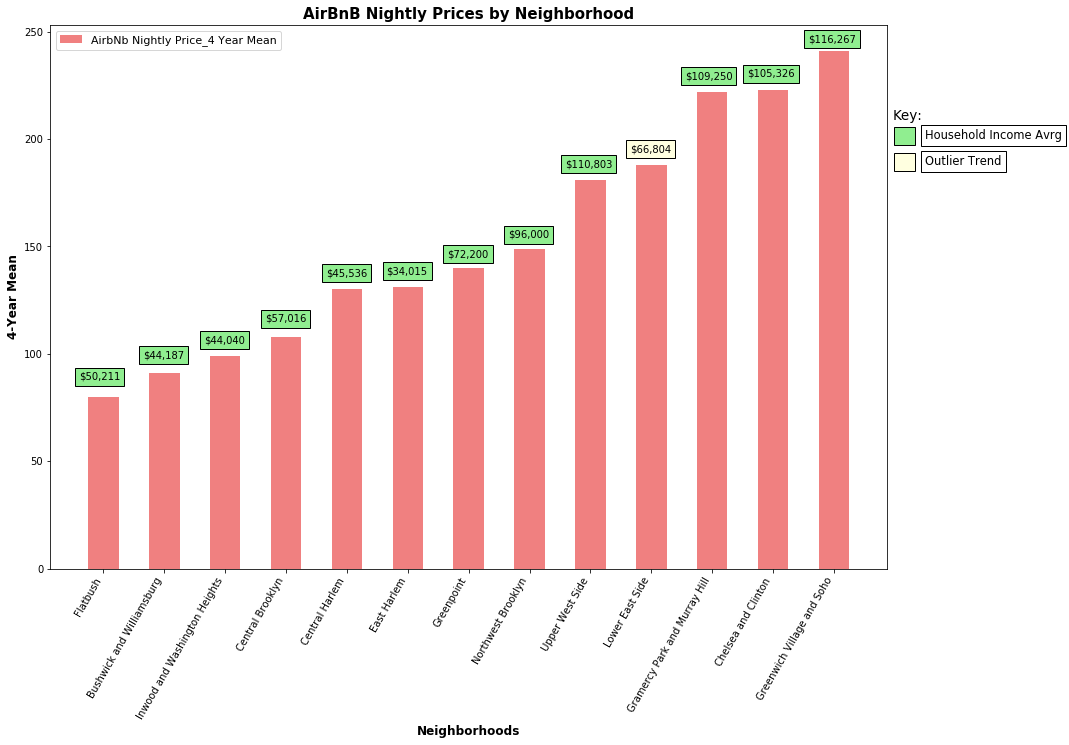

In [7]:
# Create analysis by Neighborhoods
neighborhoods = pd.read_csv('Neighborhood_ZipMeans.csv')


# Plot Neighborhood Night Prices & Add in Household Income as a text box
plt.figure(figsize = (15,10));
x_axis = np.arange(len(neighborhoods['Neighborhood']));
tick_locations = [x for x in x_axis];
plt.xticks(tick_locations, neighborhoods['Neighborhood'], rotation=60, fontsize=10, horizontalalignment='right');
plt.bar(x_axis, neighborhoods['4year_Mean'], label ='AirbNb Nightly Price_4 Year Mean',width = 0.5, color='lightcoral');
plt.legend(loc='upper left', fontsize=11);
plt.xlabel('Neighborhoods', fontsize=12, fontweight='bold');
plt.ylabel('4-Year Mean', fontsize=12, fontweight='bold');
plt.title('AirBnB Nightly Prices by Neighborhood', fontsize=15, fontweight='bold');


# Add unique text label for Household Income 
plt.text(-.4, 88, '$50,211', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(0.65, 98, '$44,187', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(1.65, 105, '$44,040', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(2.65, 115, '$57,016', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(3.65, 136, '$45,536', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(4.65, 137, '$34,015', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(5.65, 145, '$72,200', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(6.65, 154, '$96,000', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(7.58, 187, '$110,803', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(8.65, 194, '$66,804', fontsize=10, bbox={'facecolor': 'lightyellow'});
plt.text(9.55, 228, '$109,250', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(10.58, 229, '$105,326', fontsize=10, bbox={'facecolor': 'lightgreen'});
plt.text(11.58, 245, '$116,267', fontsize=10, bbox={'facecolor': 'lightgreen'});

# Add key for text boxes
plt.text(12.97, 209, 'Key:', fontsize=13.5);
plt.text(13.05, 200, 'xx', color='lightgreen', fontsize=11, bbox={'facecolor': 'lightgreen'});
plt.text(13.5, 200, 'Household Income Avrg', fontsize=11.5, bbox={'facecolor': 'w'});
plt.text(13.05, 188, 'xx', color='lightyellow', fontsize=11, bbox={'facecolor': 'lightyellow'});
plt.text(13.5, 188, 'Outlier Trend', fontsize=11.5, bbox={'facecolor': 'w'});

# Save fig
plt.savefig("PriceNeighborhood_BarGraph.png")

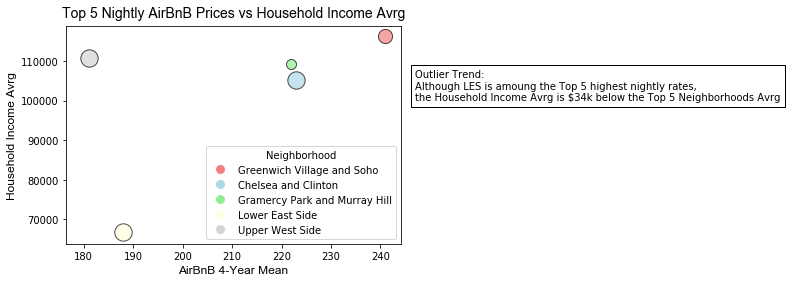

In [262]:
from matplotlib.lines import Line2D

# Deep dive into Lower East Side
gvs = neighborhoods.loc[neighborhoods["Neighborhood"] == "Greenwich Village and Soho"]
cc = neighborhoods.loc[neighborhoods["Neighborhood"] == "Chelsea and Clinton"]
gpmh = neighborhoods.loc[neighborhoods["Neighborhood"] == "Gramercy Park and Murray Hill"]
les = neighborhoods.loc[neighborhoods["Neighborhood"] == "Lower East Side"]
uws = neighborhoods.loc[neighborhoods["Neighborhood"] == "Upper West Side"]

# Build the scatter plots for top 5 nightly prices
plt.scatter(gvs["4year_Mean"], gvs["Income_Mean"],
            s=gvs["Zipcode_Count"] *100.5, alpha=.7,color = 'lightcoral', edgecolors='black');

plt.scatter(cc["4year_Mean"], cc["Income_Mean"],
            s=cc["Zipcode_Count"] *100.5, alpha=.7,color = 'lightblue', edgecolors='black');

plt.scatter(gpmh["4year_Mean"], gpmh["Income_Mean"],
            s=gpmh["Zipcode_Count"] *100.5, alpha=.7,color = 'lightgreen', edgecolors='black');

plt.scatter(les["4year_Mean"], les["Income_Mean"],
            s=les["Zipcode_Count"] *100.5, alpha=.7,color = 'lightyellow', edgecolors='black');

plt.scatter(uws["4year_Mean"], uws["Income_Mean"],
            s=uws["Zipcode_Count"] *100.5, alpha=.7,color = 'lightgrey', edgecolors='black');

# Incorporate the other graph properties
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
axis_font = {'fontname':'Arial', 'size':'12'}

plt.xlabel('AirBnB 4-Year Mean', **axis_font);
plt.ylabel('Household Income Avrg', **axis_font);
plt.title('Top 5 Nightly AirBnB Prices vs Household Income Avrg', **title_font);

# Create a legend
line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=10, markerfacecolor="lightcoral")
line2 = Line2D(range(1), range(1), color="white", marker='o',markersize=10, markerfacecolor="lightblue")
line3 = Line2D(range(1), range(1), color="white", marker='o',markersize=10, markerfacecolor="lightgreen")
line4 = Line2D(range(1), range(1), color="white", marker='o',markersize=10, markerfacecolor="lightyellow")
line5 = Line2D(range(1), range(1), color="white", marker='o',markersize=10, markerfacecolor="lightgrey")
plt.legend((line1,line2,line3,line4,line5),('Greenwich Village and Soho',
                                            'Chelsea and Clinton', 'Gramercy Park and Murray Hill',
                                           'Lower East Side', 'Upper West Side'),
           numpoints=1, loc='best', title='Neighborhood', frameon=True);

# Add analysis to the right
plt.text(247, 100000, 'Outlier Trend:\nAlthough LES is amoung the Top 5 highest nightly rates, \nthe Household Income Avrg is $34k below the Top 5 Neighborhoods Avrg', 
         fontsize=10, bbox={'facecolor': 'w'});


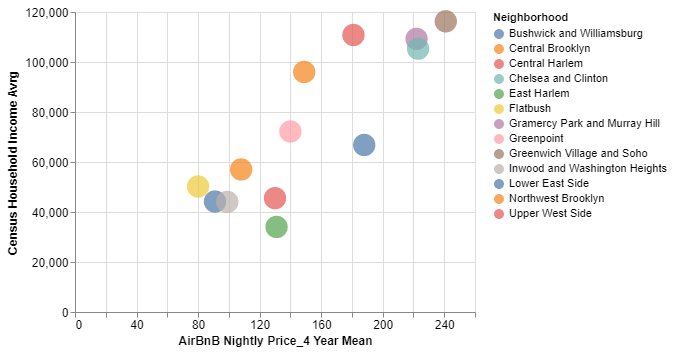

In [8]:
import altair as alt
alt.renderers.enable('notebook')

source = neighborhoods

alt.Chart(source).mark_circle(size=500).encode(
    x=alt.X('4year_Mean', axis=alt.Axis(title='AirBnB Nightly Price_4 Year Mean')),
    y=alt.Y('Income_Mean', axis=alt.Axis(title='Census Household Income Avrg')),
    color='Neighborhood',
    tooltip=['Neighborhood', '4year_Mean', 'Income_Mean']
).configure_axis(labelFontSize=12, titleFontSize=12).configure_legend(labelFontSize=11, titleFontSize=11)